# Data in Python: Loading, Plotting, and Fitting

In this notebook, we will explore how to load and save datafiles in Python using Numpy, and how to plot and explore data and functions with a library called Matplotlib.

**Learning objectives for this notebook:**

* Student is able to load data from ASCII text files
* Student is able to save data to ASCII text files
* Student is able to generate plots of data and functions
* Student is able to produce plots with labels, grids, horizontal and verical lines, and legends
* Student is able to save plots as high-quality PDF files
* Student is able to use `matplotlib` to create a plot that enables active zooming
* Student is able to fit a model to data using "fitting by hand"
* Student is able to use `curve_fit` to perform a least-squares fit of a model to a dataset
* Student is able to calculate the statistical error in the parameters of a least-squares fit

## Loading and saving data with Numpy

Here, we will explore some functions provided by numpy for loading data from files into python, and for saving data from python to files. 

### Loading data

Until now, we have seen how to generate data inside python, using for example by assigning values to arrays, or, for example, by using functions like `np.zeros()`, `np.linspace()`, and `np.random.random()`.

However, what if we want to use Python to analyze data from an experiment? How do we get the data into python? 

Sometimes, we might have just a small number of data points that we have measured by hand and wrote down on a piece of paper: say a list of measured fall times for different heights. In this case, you can just "load" the data by just defining Python arrays that contain your measured values:

```
# Drop heights in meters
d = np.array([0, 0.5, 1.0, 1.5 , 2.0,  2.5]) 
# Measured times
t = np.array([0, 0.2, 0.3, 0.44, 0.6, 0.89])
```

In a computer controlled experiment, though, you may have, for example, a data file of voltage measured as a function of time from an acquisition card or oscilloscope which may have hundreds, thousands, or even millions of data points. 

Typically (if you're lucky), the measurement software will save its data in an (<a href=https://en.wikipedia.org/wiki/ASCII>ASCII</a>) text file. (Or at least there will be software for converting the data to an ASCII text file...) For example, let's think about an experiment where we measure a voltage as a function of time. In this case, the data will often be recorded in two columns of numbers in the text file, separated by a space. The first number would represent the time of the measurement, say in seconds, and the second the measured voltage, in volts:

`File: v_vs_time.dat:`
```
0.000000000000000000e+00 -4.881968419624156397e-01
1.001001001001000992e-02 6.574038838172248100e-01
2.002002002002001985e-02 -4.868767180890223312e-01
3.003003003003002977e-02 -8.581352351530058264e-01
4.004004004004003969e-02 1.605962930324425164e+00
5.005005005005004615e-02 -5.458119271515118331e-01
6.006006006006005954e-02 -1.910121935716198927e+00
7.007007007007007293e-02 -8.213606665035044774e-01
8.008008008008007939e-02 -1.724982388182002335e+00
...
```

This is an example of a file format called <a href=https://en.wikipedia.org/wiki/Delimiter-separated_values>Delimiter-separated values (DSV)</a>. In the example above, the "delimiter" (ie the thing that separates the values) is a space. 

Another common delimiter is a comma `,`, often named a `.csv` file for "comma separated value" file. This is a common "export" format from spreadsheets like excel. A third common value is a "tab separated value" file (often saved with a `.tsv` file extension, also available as an export option from some spreadsheets), which separates the values in the file be tab characters (which in Python strings show up as special character `\t`, a bit like the newline `\n`).

For reading in DSV files, Python has a very simple routine `np.loadtxt()`:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

It can handle any type of delimiter: the default is any whitespace (tab or space), but this can also be configured using the `delimiter=` keyword argument. It also does not care about the file extension: for example, it is fine if a CSV file does not have a `.csv` extension (it doesn't even have to have an extension!). A typical convention is to name the files containing ASCII text data with an extension `.dat`.

Let's give it a try using the file `v_vs_time.dat`: 

In [1]:
import numpy as np 
data = np.loadtxt("v_vs_time.dat")

Here we have assigned the return value of `np.loadtxt` to a variable `data`, which is a numpy array. But what exactly is our variable `data`? We can find out more by looking at the shape of the returned `data` array:

In [ ]:
data.shape

When `np.loadtxt()` loads a file, it will return a 2D numpy array with of shape `(n,m)`, where `n` is the number lines in the file and `m` is the number of columns (here, we have 1000 points and 2 columns). 

As I mentioned above, the first column represents the time that the measurement was taken, and the second column represents the measured voltage in volts. We will typically want to extract these into two vectors `t` and `v`, which we can do using slicing:

In [ ]:
t = data[:,0]
v = data[:,1]

We can look at the first 10 points and see that we have successfully loaded the data from the file! 

In [ ]:
print(t[0:10])
print(v[0:10])

We can check that the data is correct by opening the data file itself from the Jupyter file browser: Jupyter can also directly load and edit text files. (Another way of loading hand-recorded data into Python is just to use Jupyter to create an ASCII `.dat` file yourself.)

**Exercise 5.1:** Load the data from the file `exercise_data.dat`. The first column represents a measurement time in seconds, and the second represents a measurement voltage in volts. How many points are in the dataset? 

*(Important: make sure that you use different variable names than t and v for the data you load, since we will continue to use the data we loaded in the example code in the sections below!)*

In [ ]:
your code here to load the data (using different variable names than t and v!) and
check the size of the arrays you get

### Saving data

We can also save data using a numpy routine `np.savetxt()`. To do this, we have to "pack" the data back into a numpy array of the correct shape. 

Let's take a look at an example where we calculate the square of the measured voltage and save this back into a new file:

In [ ]:
v_squared = v**2

To "pack" them together into a matrix like the one returned by `np.loadtxt()`, we can first create a 2D matrix of the correct size and then use slicing with an assignment operator `=` to give the columns the correct values:

In [ ]:
# Create empty array
to_save = np.zeros([len(v), 2])

# Fill columns with data
to_save[:,0] = t
to_save[:,1] = v_squared

Now we are ready to use `np.savetxt()`:

In [ ]:
np.savetxt("vsquare_vs_time.dat", to_save)

## Plotting data and functions with Matplotlib

In the above example, we loaded in some measured data from a file into an array. From there, we could perform mathematical operations on our data, and save it back to a new file. 

However, what every physicist will want to do is plot the data to see what it looks like!!!!!

Here, we will show you how to do this using the `matplotlib` library: 

https://matplotlib.org

### Plotting basics

Specifically, we will need the `pyplot` module of `matplotlib`: 

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

We will import it with the shortcut / "name" / "prefix" `plt`: 

In [2]:
import matplotlib.pyplot as plt

I find it handy to also increase the "dpi" setting to make the plots a bit bigger. To do this, you need to execute the following in a separate cell from the `import` statement above:

In [ ]:
plt.rcParams['figure.dpi'] = 100

The routine for making line plots of your data is `plt.plot()`: 

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

In its simplest form, you can just give it an array and ask it to plot it for you:

In [ ]:
plt.plot(v)
plt.show()

Wow, looks really cool! 

The y axis is clearly the measured voltage. But what is the x-axis? 

If you give the `plt.plot()` command only one array, it will use that array data for the y-axis, and use the index number for the x-axis. Since our dataset has 1000 points, the x-axis runs from 0 to 1000. 

Now that we know this, we should actually **ALWAYS add axis labels to our plots. ALWAYS!!!**

**ALWAYS!!!**
**ALWAYS!!!**
**ALWAYS!!!**

**ALWAYS!!!**
**ALWAYS!!!**

To do this, you can use the `plt.xlabel()` and `plt.ylabel()` commands:

In [ ]:
plt.plot(v)
plt.xlabel("Point number")
plt.ylabel("Voltage (V)")
plt.show()

If you want, you can also add a grid (depends on your personal taste preference and what you are using the plots for): 

In [ ]:
plt.plot(v)
plt.xlabel("Point number")
plt.ylabel("Voltage (V)")
plt.grid()
plt.show()

You can also add vertical or horizontal dashed lines, which I will use here to add zero axis lines:

In [ ]:
plt.plot(v)
plt.xlabel("Point number")
plt.ylabel("Voltage (V)")
plt.axhline(0, ls=':', c='grey')
plt.axvline(0, ls=':', c='grey')
plt.show()

Ok, this is all great, but what if I want to plot the voltage vs. time, and not point number? For this, I give `plt.plot()` two arguments:

In [ ]:
plt.plot(t,v)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

Great! This is nearly looking like something I could put into my lab report. But wait: how do I do this? 

Fortunately, `matplotlib` has functions that easily allow you to save your plot as a high-quality PDF format, perfect for importing into <a href=https://en.wikipedia.org/wiki/LaTeX>LaTeX</a> for writing your awesome lab report!

In [ ]:
plt.plot(t,v)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.savefig("myplot.pdf")
plt.show()

If you look in the file browser, you will now see a file `myplot.pdf`. If you open it, you will see that is a high-quality <a href=https://en.wikipedia.org/wiki/Vector_graphics>vector graphics</a> PDF. 

Sometimes, one may want to plot the data as points instead of a connected line. You can do this by adding a '.' after your arrays:

In [ ]:
plt.plot(t,v, '.')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

Do you want a different point size? Or a different symbol? You can see how to change all of this by looking at the documentation page of the plot function: 

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html

You can also bring up the built-in help of the function by clicking on the function name in the code cell above and typing `Shift-Tab`. 

You may want to have more than one thing plotted in your plot. To do this, you simply have to run the plot command twice:

In [ ]:
# A "fake" dataset to illustrate plotting
v2 = np.random.normal(10,0.5,1000)

plt.plot(t,v)
plt.plot(t,v2)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

Matplotlib will automatically change the color of the second dataset (you can also control them manually, see the <a href= https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html>documentation</a>). But it can be hard to tell which one is which, and for this reason, it can useful to add a legend to your plot, which can be done using this code: 

In [ ]:
plt.plot(t,v, label="Voltage 1")
plt.plot(t,v2, label="Voltage 2")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.show()

Finally, if you want a really big figure, you can also adjust the figure size:

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(t,v, label="Voltage 1")
plt.plot(t,v2, label="Voltage 2")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.legend()
plt.show()

**Exercise 5.2:** Make a plot of the data you loaded from example 5.1. 

In [ ]:
code to plot the data you loaded in example 5.1

**Exercise 5.3:**  As you may have noticed, the data from `example_data.dat` looks like a stright line, while the data from `exercise_data.dat` does not seem like straight line, but instead looks like a power law function $V = at^p$ with power $p$. 

One way to test for such power law relations is to make a plot with an x-axis that is not $t$ but instead $t^p$: if you get the correct $p$, then the  data plotted will form a straight line. 

Write code to plot $V$ against $t^p$ and they put in different guesses at the power $p$ to see if you can see what the power is. 

In [ ]:
code to plot data from example 5.1 with a different x-axis

### Active zooming: The "notebook" driver

The above examples are great for plotting your data for a report or exploring functions. 

Sometimes, though, you may want to be able to zoom in on a tiny little features in your function or data. Here is an example of some data that one might want to zoom in on:

In [3]:
# unpack=True is also a handy way to load data 
# (saves some extra code)
# Note this is a big data file, it will take a while to load.

x,y = np.loadtxt("example2.dat", unpack=True)

<IPython.core.display.Javascript object>


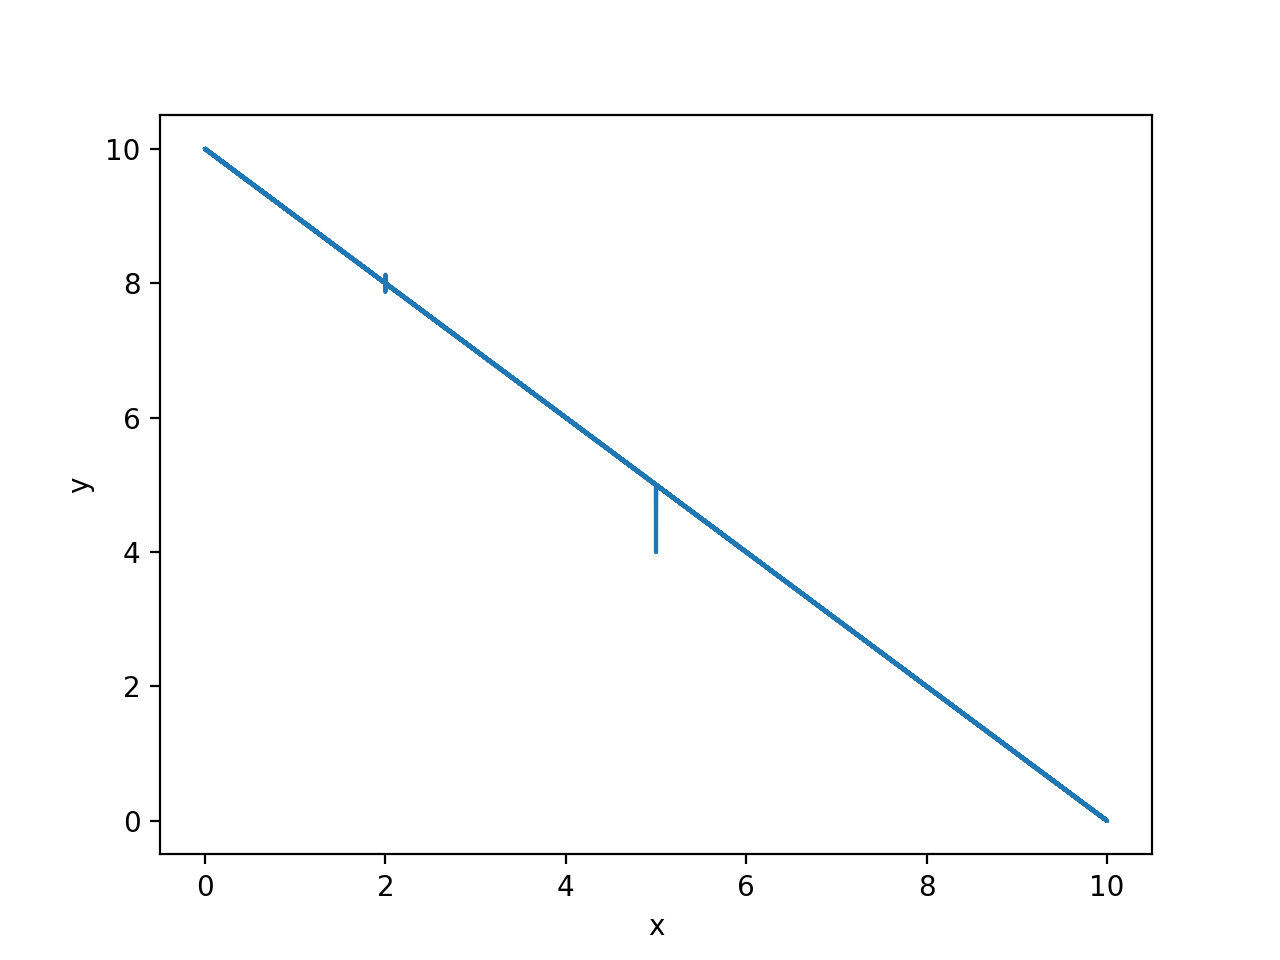

In [6]:
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Clearly, this function has some tiny little blip around x=2 and another around x=5. As a curious physicist, I'd like to zoom in and see in more detail what these look like. 

I could do this using the `plt.xlim()` and `plt.ylim()` functions, but what I'd really like to be able to do is to click and zoom in on them. 

For these, we can use `matplotlib` with a different driver called the `notebook` driver. To turn this on, we can use this command:

In [7]:
%matplotlib notebook

and then plot it again:

<IPython.core.display.Javascript object>


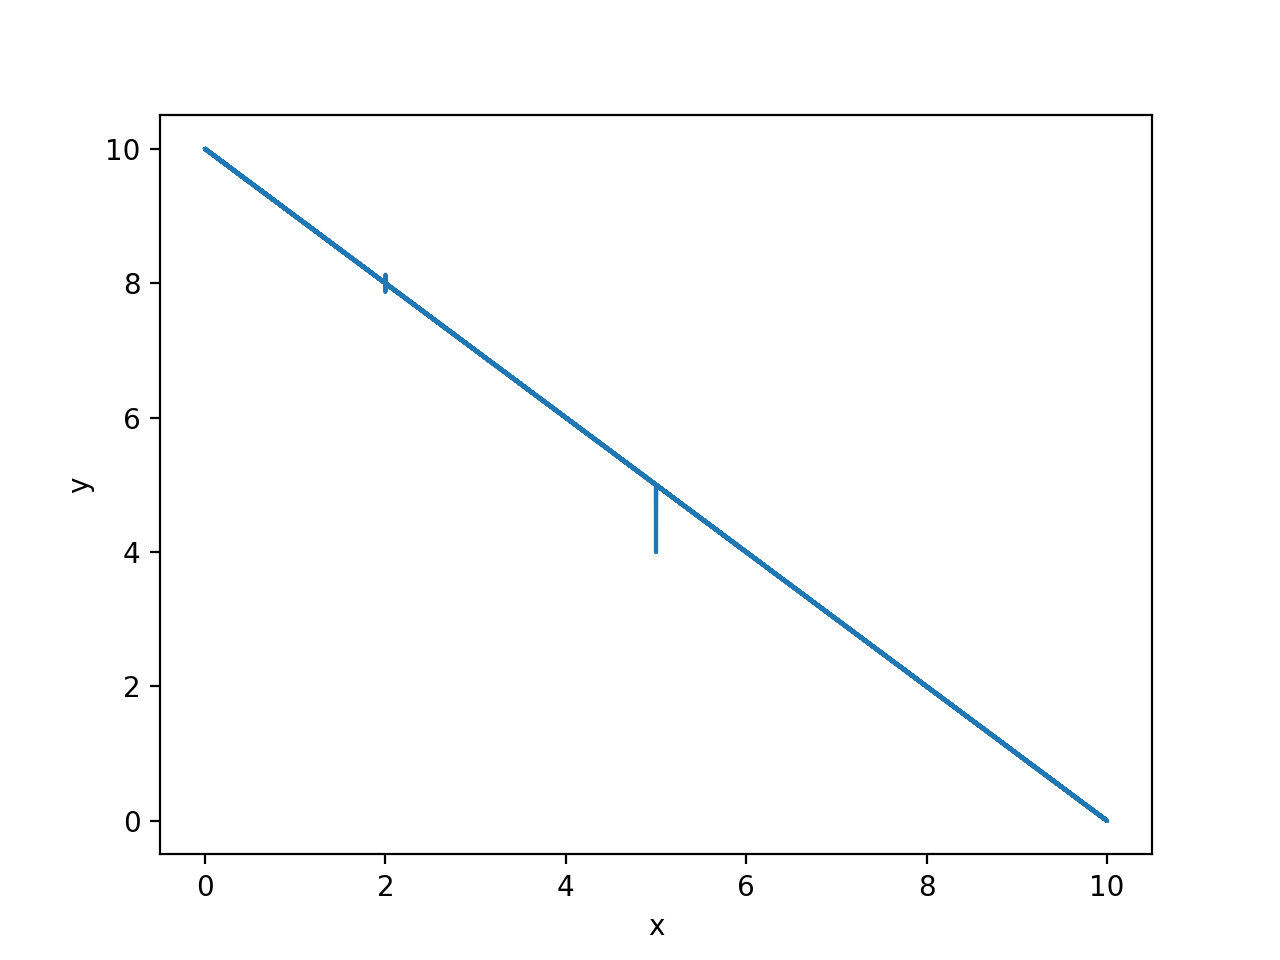

In [8]:
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Now, instead of getting just an image in your web browser, you will get an interactive plot. At the bottom, there are some controls. If you click on the "rectangle" one, this will allow you to zoom in the plot by dragging a box around the feature you want to zoom in to. If you press the "home" button it will go back to the starting zoom. When you are done zooming around, you need to push the "power" button at the top right to finish zooming with the plot. If you want to start zooming again, you need to run the code again to make the plot.

This can be quite useful, but can also be annoying (for example if you forget to turn the "power" button off). To turn off the `notebook` driver, use the `%matplotlib` command again with the option `inline`: 

In [ ]:
%matplotlib inline

If you have changed the `dpi` setting, you will need to re-run the command:

In [ ]:
plt.rcParams['figure.dpi'] = 100

### Plotting functions in Python

Sometimes (often?) in physics, we physicists will go through a long mathematical derivation to come up with a formula describing a physical problem. Sometimes this formula is very complicated, and it is then handy to be able to plot the formula to get feeling for what the function looks like. 

We've learned above how to plot data, but how do we plot a function in Python?

It turns out it is actually pretty easy. Let's look at a concrete example: lets plot the height of a <a href=https://en.wikipedia.org/wiki/Projectile>projectile</a> as a function of the distance it travels. Using Newton's laws, we can find that the projectile's <a href=https://en.wikipedia.org/wiki/Trajectory#Uniform_gravity,_neither_drag_nor_wind>trajectory</a> is given by: 

$$
y = -\frac{g}{2 v_0^2 \cos^2 \theta} x^2 + x \tan \theta
$$

The first step is to make a numpy array `x` that includes the points at which we want to evaluate the function. Let's guess and say we want to look in the range of x from 0 to 12 meters. We also need to pick the number of points: to get a smooth curve, let's pick say 1000 points:

In [ ]:
x = np.linspace(0,12,1000)

Now we want to calculate `y` for all of these x-points. Let's say we pick an angle of 45 degrees and an initial velocity $v_0$ of 10 m/s. We can then just directly use numpy "vectorized" calculations to calculate the values of `y` for all of our `x` points using a single line of code: 

In [ ]:
# Parameters
v0 = 10 # m/s
theta = 45/180*np.pi # Python works with angles in Radians, and np.pi = pi (3.14596...)
g = 9.8 # m/s^2

# A vectorized calculation to calculate y for all values of x
y = -g/(2*v0**2*np.cos(theta)**2)*x**2 + x*np.tan(theta)

Now, let's plot it!

In [ ]:
plt.plot(x,y)
plt.xlabel("Distance (m)")
plt.ylabel("Height (m)")
plt.axhline(0, ls=":", c="grey")
plt.show()

We can also now see how easy it is to combine plotting functions with plotting data. For example, in with our voltage data above, if we want to plot a straight line function over over the data: 

In [ ]:
line = 2*t
plt.plot(t,v, '.')
plt.plot(t,line, '--', lw=4)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

Here, we also used the `linewidth` parameter (which can be shorted to `lw` to save typing) to make the line a bit fatter so it is easier to see, and used the '--' plot format specifier to make it a dashed line. 

**Exercise 5.4:** Another way to get the exponent is to plot $\log(V)$ vs $\log(t)$ (a log-log plot). If the data really follows a power law relation, then this should give a straight line with a slope determined by the exponent. Try this, and then add a straight line $\log(V) = p * \log(t)$ to the plot. Play around with the value of $p$ until the line has the same slope as the data. For this plot, use solid filled circle for the data and a solid line for the theory.

*(Do you get an warning message? Why?)*

In [ ]:
your code

## Fitting

In experimental physics, one of our primary goals is to try to figure out if our observed experimental measurements match the theoretical predictions that we can make from mathematical models. 

If it does, then we are happy and we have now confirmed that our mathematical model is at least one way to explain our data! (We typically say that the experimental observations are consistent with the predictions of theory.) If that all works, we also then try to take this a step further, and extract values for our theoretical parameters from our data.

In this section of the notebook, we will discuss how to fit a mathematical model to your experimental data and extract both the best-fit parameters of your model for the given dataset, and also the estimated (statistical) uncertainties in these fitted parameters.

### "Fitting by hand"

A first super-important step in any fitting is to make some plots of your experimental model and find out if there are parameter regimes where it can at least come close the data. By "fitting by hand", you can already get an idea of if you model is a good description of your data, and approximately what the values of the model parameters are.

In the last plot above, we saw an example of plotting a function on top of some data. 
If we look at the data, even without looking at the plotted function, we can see that our experimental data of voltage vs. time seems to be a straight line. This suggests that we can model the data with a linear function:

$$
V(t) = at + b
$$

where $a$ is some parameter with the units of V/s representing the slope of the line, and $b$ is a parameter describing the value of the voltage at $t=0$.

The fact that the the line $V = 2t$ (the orange dashed line) seems to pass through the middle of our blue data already suggests that for our data (the blue points), $a = 2$ V/s and $b = 0$ V seems like pretty good parameters for our model to describe the data.

We can also see that `a = 1.7` and `b = 1.7` are also OK (they go through a lot of the data points), but are probably not as good:

In [ ]:
line1 = 1.7*t+1.7
line2 = 2*t
plt.plot(t,v, '.',c='k', ms=2)
plt.plot(t,line1, '--', c='b', lw=4, label="a=1.7 b=1.7")
plt.plot(t,line2, '--', c='r', lw=4, label="a=2.0 b=0.0")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("a = 1.7 and b = 1.7 are also OK, but not as good as a = 2 and b = 0")
plt.show()

*(Here we also show some examples of more advanced formatting options of the <a href=https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html>plt.plot()</a> function to change the colors of the lines (`c=`) and the size of the data markers (`ms=`). I also give an example of adding a title to a graph: this can be handy in a notebook like this one, but in any real lab report, you should NEVER have titles on your plots. Instead, in a report, you should describe what is in the plot using a figure caption.)*

From "fitting by hand" (just plotting the data and adjusting the parameters), you can already get a good feeling for functions and parameters fit "pretty well" and which "not as well".

But: how do I find the BEST parameters (`a` and `b` in this case) for my data? And how do I know how accurately my data allows me to determine these parameters? 

For that, we can use a procedure called <a href=https://en.wikipedia.org/wiki/Least_squares>least squares fitting</a>. In the next part of the lab course, you will learn more about least squares fitting and how it works. Here, we will look at how to code it in Python, how to use it to get the best fit parameters of a model for you data, and how to find out what the <a href=https://en.wikipedia.org/wiki/Errors_and_residuals>statistical error</a> is on the parameters of your model given the data you are using for the fit. 

**Exercise 5.5:** Using the data you loaded in exercise 5.1, try fitting the function $V = at^p$ "by hand" to the data by manually adjusting $a$ and $p$ and replotting the function until you think you have the best fit. What are the values of $a$ and $p$ that you find? 

In [ ]:
code to fit data "by hand" to a power law

### Least squares fitting

To have Python automatically find the best parameters for fitting your data with a given function, you can use the `curve_fit()` routine from the `scipy` (scientific Python) package:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Since we will use only the `curve_fit` routine, we will import it on its own:

In [ ]:
from scipy.optimize import curve_fit

To use curve fit, we first need to create a Python function that returns the mathematical function that we want to fit. Our function is:

$$
f(x) = ax + b
$$

It has one variable, $x$, and two parameters, $a$ and $b$. For using `curve_fit`, we will need to make a Python function that takes three arguments: the first is the variable `x` (for the above, it will be time), and the other two arguments are the fit parameters `a` and `b`, and which should return the predicted voltage:

In [ ]:
def f(x,a,b):
    return a*x+b

In the simplest case (and it will always work when you are fitting a stright line), you can just then directly send the function and your x and y data and it will do the fit for you:

In [ ]:
values, covariance = curve_fit(f, t, v)

Tada! `curve_fit` actually returns two things. The first is an array containing the optimal fit values:

In [ ]:
print(values)

The first one corresponds to the first parameter of the function and the second to the second: in our case, `a` and `b`:

In [ ]:
a_fit = values[0]
b_fit = values[1]
print(a_fit)
print(b_fit)

We can now check what the fit looks like:

In [ ]:
plt.plot(t,v, '.',c='k', ms=2)
plt.plot(t,a_fit*t+b_fit, '--', c='blue', lw=4, label="Fit (a = %.2f, b = %.2f)" % (a_fit, b_fit))
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

Cool! Also, it turns out that the best statistical fit of the slope to our data is not exactly 2 but slightly higher (about 2.0148)

In addition, sometimes in measurements, we also have error bars on the each of the individual black data points in the plot, and sometimes some data points could have more error than others. In these cases, the fitting routine can take these individual error bars into account when performing this fit: we will see more about this later in the course.

**Exercise 5.6:** Perform a least squares fit to of the data from exercise 5.1 to the function $V = at^p$. Make  a plot of the function with the values of $p$ and $a$ from the fit on top of the data. How close are the fitted values to your attempt at fitting by hand? 

In [ ]:
code that performs a least square fit to the exercise data

### Initial guesses
The curve fit routine also has the option to provide initial guesses on your parameters using a keyword argument `p0`:

In [ ]:
initial_guesses = (2.5,1)
values2, covariance2 = curve_fit(f, t, v, p0 = initial_guesses)
print(values2)
print(values)

In this case it (nearly) did not make a difference: and in fact, for fitting a linear function, least squares fitting will converge to the same set of values, no matter what initial guess you provide. 

This is NOT true for functions $f(x)$ that are not linear in $x$. In really bad cases, the parameter values that `curve_fit` finds can even be highly sensitive to the initial conditions. For this reason, it is always a good idea, and sometimes absolutely necessary, to first do some "fitting by hand", and then ideally provide  these initial conditions to the `curve_fit` routine. 

And even if you do not provide hand-tuned initial guesses (which you may not if you are automatically fitting a huge number of datasets), it is important that you always make a plot of the the fitted curves that you find on top of the data just to make sure nothing goes wrong. 

### Errors on parameters

We found above that the best statistical fit to our data was not our initial estimate of `a = 2`, but actually more like `a = 2.0148`. 

But the line with `a = 2` also looked pretty good, right? How much better is the fit with `a = 2.0148`? 

To find this out, we can use the other variable that `curve_fit` returned: the <a href=https://en.wikipedia.org/wiki/Covariance_matrix>covariance matrix</a>. With two parameters, the covariance matrix is a 2x2 array:  

In [ ]:
values, covariance = curve_fit(f, t, v)
print(covariance)

The most important two for us are the diagonal elements: the first diagonal element tells us the square of the <a href=https://en.wikipedia.org/wiki/Standard_error>standard error</a> $\sigma_a$ of parameter `a` and the second diagonal element gives us the square of $\sigma_b$:

In [ ]:
a_err = np.sqrt(covariance[0,0])
b_err = np.sqrt(covariance[1,1])
print(a_err)
print(b_err)

(The standard error $\sigma_a$ is also sometimes also written as $\Delta a$,  and is also sometimes called the parameter "uncertainty" instead of the parameter "error"). 

We can now quote the full values of the parameters from our fit, including errors:

In [ ]:
print("The value of a is %.2f +/- %.2f" % (a_fit, a_err))
print("The value of b is %.2f +/- %.2f" % (b_fit, b_err))

Here we used a placeholder format `%.2f` designating that we want to print as float with two decimals. There are a 
<a href=https://www.python-course.eu/python3_formatted_output.php>lot</a> of other ways to format your string.

Note that typically when you quote an error, you should pick only one significant digit. And also, when you quote the value of a parameter, you should also quote it with the same number of decimal places as your error. 

So in this case, I quote the value of `a` as 2.015, and not its "exact" value of 2.0148415283012246. Why? The reason is that doesn't make sense to quote more digits on the value of `a` than a number of digits corresponding to the size of the statistical error, and so physicists and scientists truncate the accuracy of the numbers they report to a level comparable to the error. 

**Exercise 5.7** Calculated the errors on the fit parameters from your fit in exercise 5.5. Was your estimate of $p$ from exercise 5.4 within the statistical error margins from you fit? Were the values for $a$ and $p$ you found from "fitting by hand" within the statistical error margins? 

In [ ]:
code to calculate the parameter uncertainties (errors) and check if your earlier
estimates agree with the least-square-fit values 
to within the error margins of the fit

## Solutions to exercises

**Exercise 5.1:** 

In [ ]:
# You can also use the option "unpack=True" to have loadtxt send back all columns separately
t2,v2 = np.loadtxt("exercise_data.dat", unpack=True)

print("Loaded", len(v2), "points")

**Exercise 5.2:**

In [ ]:
plt.plot(t2,v2)
# ALL PLOTS MUST HAVE LABELS WITH UNITS!!!!
plt.xlabel("t (s)")
plt.ylabel("v (V)")
plt.show()

**Exercise 5.3:** 

In [ ]:
# 2 looks not bad
p = 2
plt.plot(t2**p,v2)
# A decent label(we can use the  variable value automatically, and use latex for superscripts)
plt.xlabel("$t^"+ str(p) + "$ (s$^" + str(p)  +"$)")
plt.ylabel("v (V)")
plt.show()

**Exercise 5.4:** 

In [ ]:
# 2 looks not bad
plt.plot(np.log(t2),np.log(v2),'o', label="Data")

# Now a straight line
# This is a bit tricky, we need the same x-range as the data
# My best estimate of the slope is 2.3
x = np.log(t2)
p = 2.3
y = p*x
plt.plot(x,y, label="Slope = " + str(p))
plt.legend()

# A decent label(we can use the  variable value automatically, and use latex for superscripts)
plt.xlabel("log(t) (log(s))")
plt.ylabel("log(v) (log(V))")
plt.show()

**Exercise 5.5:** 

In [ ]:
a=2
p=2.34
plt.plot(t2,v2, 'o', label='Data')
plt.plot(t2,a*t2**p, label='Model')
plt.legend()
plt.xlabel("t (s)")
plt.ylabel("v (V)")

**Exercise 5.6:** 

In [ ]:
def f2(t,a,p):
    return a*t**p

values, covariance = curve_fit(f2, t2, v2)

a_fit = values[0]
p_fit = values[1]

print(values)

plt.plot(t2,v2, 'o', label='Data')
plt.plot(t2,f2(t2,a_fit,p_fit), label='Model')
plt.legend()
plt.xlabel("t (s)")
plt.ylabel("v (V)")

**Exercise 5.7**

In [ ]:
a_err = np.sqrt(covariance[0,0])
p_err = np.sqrt(covariance[1,1])

# Uncomment to debug :)
#print(a_err)
#print(p_err)

# A bit nerdy but cool: automatically format the string output with the 
# correct number of digits :)

# (you can also just read off the number of digits by hand and "hard code" it...)

a_dig = -(int(np.log10(a_err))-1)
p_dig = -(int(np.log10(p_err))-1)

# Uncomment to debug :)
#print(a_dig)
#print(p_dig)

a_fmt = "%." + str(a_dig) + "f"
p_fmt = "%." + str(p_dig) + "f"

# The units on a are a bit funny, so we'll skip the units on this one...
a_msg = "a has the value %s +/- %s" % (a_fmt, a_fmt)
a_msg = a_msg % (a_fit, a_err)
print(a_msg)

p_msg = "p has the value %s +/- %s" % (p_fmt, p_fmt)
p_msg = p_msg % (p_fit, p_err)
print(p_msg)